In [1]:
import pygame
import numpy as np
import matplotlib.pyplot as plt
import pymunk
import pymunk.matplotlib_util
from pymunk.vec2d import Vec2d
from matplotlib import animation
from IPython.display import HTML
%matplotlib inline

Loading chipmunk for Darwin (64bit) [//anaconda/lib/python3.5/site-packages/pymunk/libchipmunk.dylib]


In [36]:
planet[0].position - ball[0].position

Vec2d(0.0, -170.00000000002728)

In [43]:
Vec2d.length?

In [69]:
def gravity(a, b, G=6.674e-11):
    '''force of gravity attracting object b to object a '''
    aBody, aShape = a
    bBody, bShape = b
    distance = aBody.position - bBody.position
    direction = distance.normalized()
    magnitude = (G*aBody.mass*bBody.mass)/((distance.length)**2)
    return direction * magnitude

In [24]:
def circle(mass, radius, position):
    moment = pymunk.moment_for_circle(mass,0,radius,(0,0))
    body = pymunk.Body(mass,moment)
    shape = pymunk.Circle(body,radius)
    body.position=position
    body.start_position=Vec2d(position)
    return body,shape

In [73]:
gravity(planet,ball)

Vec2d(0.0, -100109999999.99998)

In [74]:
forces = [(ball[0],(gravity(planet,ball),(0,0)))]

In [94]:
space = pymunk.Space()
space.gravity = 0,0
#space.damping = 1


planet = circle((6e22), 150, (300,300))
ball = circle(10, 10, (300,600))

planet[0].position 

ball[0].apply_force_at_local_point(gravity(planet,ball),(0,0))

# for i in range (100):
#     planet[0].apply_force_at_local_point((1000,50),(0,0))

space.add(*planet)
space.add(*ball)

<cdata 'cpSpaceDebugColor &' 0x117edee4c>


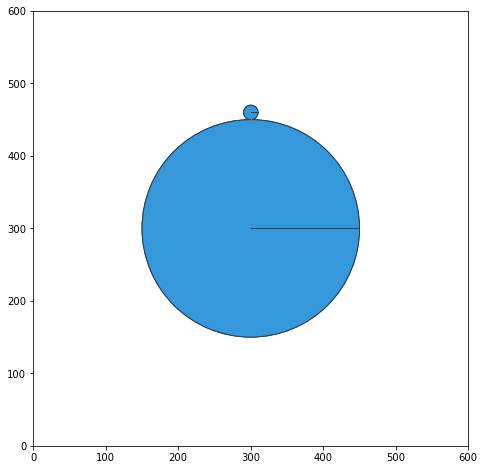

In [95]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes(xlim=(0, 600), ylim=(0, 600))
ax.set_aspect("equal")
o = pymunk.matplotlib_util.DrawOptions(ax)


def init():
    space.debug_draw(o)
    return []

def animate(dt):
    #we run the animation with half speed intentionally to make it a little nicer to look at
    for x in range(10):
        for force in forces:
            force[0].apply_force_at_local_point(*force[1])
        space.step(1/50/10/2)
    ax.clear()
    space.debug_draw(o)
    return []

frames = 150
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=frames, interval=20, blit=False)

HTML(anim.to_html5_video())